In [1]:
import pandas as pd # import pandas 
import os 
bookings = pd.read_csv("/Users/brindamunuswamy/Desktop/MIS581/h1Features.csv") # read CSV into pandas
bookings.head(15) #reading top 5 rows

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,different_assigned_room
0,0,342,2015,7,27,0,0,2,0.0,0,...,0,0,0,3,1,0,0.00,0,0,0
1,0,737,2015,7,27,0,0,2,0.0,0,...,0,0,0,4,1,0,0.00,0,0,0
2,0,7,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,1
3,0,13,2015,7,27,0,1,1,0.0,0,...,0,0,0,0,1,0,75.00,0,0,0
4,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
5,0,14,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,98.00,0,1,0
6,0,0,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,107.00,0,0,0
7,0,9,2015,7,27,0,2,2,0.0,0,...,0,0,0,0,1,0,103.00,0,1,0
8,1,85,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,82.00,0,1,0
9,1,75,2015,7,27,0,3,2,0.0,0,...,0,0,0,0,1,0,105.50,0,0,0


In [2]:
bookings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 23 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     40060 non-null  int64  
 1   lead_time                       40060 non-null  int64  
 2   arrival_date_year               40060 non-null  int64  
 3   arrival_date_month              40060 non-null  int64  
 4   arrival_date_week_number        40060 non-null  int64  
 5   stays_in_weekend_nights         40060 non-null  int64  
 6   stays_in_week_nights            40060 non-null  int64  
 7   adults                          40060 non-null  int64  
 8   children                        40060 non-null  float64
 9   babies                          40060 non-null  int64  
 10  meal                            40060 non-null  int64  
 11  market_segment                  40060 non-null  int64  
 12  distribution_channel            

In [3]:
bookings['is_canceled'].value_counts() 

0    28938
1    11122
Name: is_canceled, dtype: int64

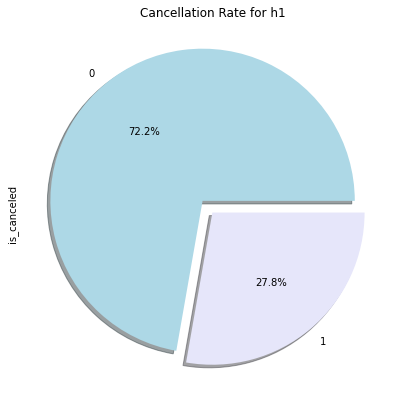

In [4]:
bookings['is_canceled'].value_counts() #benchmark cancellation rate for h1
import matplotlib.pyplot as plt
piedata = bookings['is_canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation Rate for h1")
plt.show()

In [5]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
X=bookings.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22]] 
# create data set with the predictor variables 
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   lead_time                       40060 non-null  int64  
 1   arrival_date_year               40060 non-null  int64  
 2   arrival_date_month              40060 non-null  int64  
 3   arrival_date_week_number        40060 non-null  int64  
 4   stays_in_weekend_nights         40060 non-null  int64  
 5   stays_in_week_nights            40060 non-null  int64  
 6   adults                          40060 non-null  int64  
 7   children                        40060 non-null  float64
 8   babies                          40060 non-null  int64  
 9   meal                            40060 non-null  int64  
 10  market_segment                  40060 non-null  int64  
 11  distribution_channel            40060 non-null  int64  
 12  is_repeated_guest               

In [7]:
#df = df.astype({"Column 1": float, "Column 2": int})
#X=X.astype({"adr": int})

In [8]:
Y = bookings.iloc[:,[0]] # create data set with the dependent variable
Y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40060 entries, 0 to 40059
Data columns (total 1 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   is_canceled  40060 non-null  int64
dtypes: int64(1)
memory usage: 313.1 KB


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3)
# splitting data set into training and validation sets

In [10]:
import numpy as np
XGBmodel = XGBClassifier(eval_metric='error',use_label_encoder=False)
XGBmodel.fit(X_train, np.ravel(Y_train))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='error',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='exact',
              use_label_encoder=False, validate_parameters=1, verbosity=None)

In [11]:
Y_pred = XGBmodel.predict(X_test) # Predictions for test data set
predictions = [round(value) for value in Y_pred]

In [12]:
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0)) # accuracy for predictions vs actual values 

Accuracy: 85.21%


In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, Y_pred)) # confusion matrix for the predictions vs actual values 

[[8018  563]
 [1215 2222]]


In [14]:
print(classification_report(Y_test, Y_pred)) # clssification report for predictions vs actuals 

              precision    recall  f1-score   support

           0       0.87      0.93      0.90      8581
           1       0.80      0.65      0.71      3437

    accuracy                           0.85     12018
   macro avg       0.83      0.79      0.81     12018
weighted avg       0.85      0.85      0.85     12018



In [17]:
xgb_score = cross_val_score(XGBmodel, X, np.ravel(Y), cv=10, scoring='roc_auc')
print("Mean AUC Score - XGBoost: ", xgb_score.mean())
# AUC score for the prediction model 

Mean AUC Score - XGBoost:  0.36899215148798786


In [15]:
df = pd.DataFrame(data=Y_pred, columns=["canceled"])
df['canceled'].value_counts()

0    9233
1    2785
Name: canceled, dtype: int64

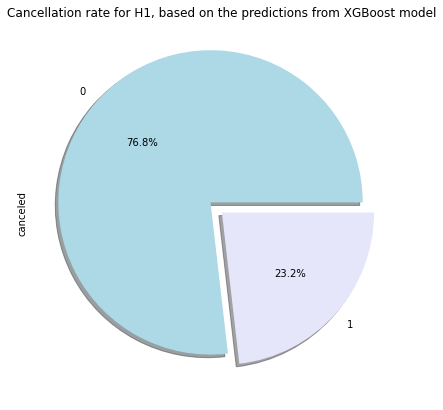

In [16]:
import matplotlib.pyplot as plt
piedata = df['canceled'].value_counts()
my_colors = ['lightblue','lavender'] # custom colors
my_explode = (0.1,0) # custom effects
plt.figure(figsize=(7,7)) #custom size for the pie chart
piedata.plot.pie(autopct="%.1f%%",colors=my_colors,explode=my_explode,shadow=True) #pie chart creation
plt.title("Cancellation rate for H1, based on the predictions from XGBoost model")
plt.show() # displaying only chart without the extra information
#benchmark
#0    28938
#1    11122